In [1]:
import math as mt
import numpy as np
import pandas as pd
from scipy.stats import norm

## Experiment Overview

Experiment Name: "Free Trial" Screener.

It is conducted by Udacity, a website dedicated to teaching online - with the overall business goal of maximizing course completion by students.

## Current Conditions Before Change 
- At the time of this experiment, Udacity courses currently have two options on the course overview page: "start free trial", and "access course materials".
- If the student clicks "start free trial", they will be asked to enter their credit card information, and then they will be enrolled in a free trial for the paid version of the course. After 14 days, they will automatically be charged unless they cancel first.
- If the student clicks "access course materials", they will be able to view the videos and take the quizzes for free, but they will not receive coaching support or a verified certificate, and they will not submit their final project for feedback.

## Experiment Hypothesis 
The hypothesis was that this might set clearer expectations for students upfront, thus reducing the number of frustrated students who left the free trial because they didn't have enough time—without significantly reducing the number of students to continue past the free trial and eventually complete the course. If this hypothesis held true, Udacity could improve the overall student experience and improve coaches' capacity to support students who are likely to complete the course.

## Experiment Details 
The unit of diversion is a cookie, although if the student enrolls in the free trial, they are tracked by user-id from that point forward. The same user-id cannot enroll in the free trial twice. For users that do not enroll, their user-id is not tracked in the experiment, even if they were signed in when they visited the course overview page.

## Description of Experimented Change 
In the experiment, Udacity tested a change where if the student clicked "start free trial", they were asked how much time they had available to devote to the course.
If the student indicated 5 or more hours per week, they would be taken through the checkout process as usual. If they indicated fewer than 5 hours per week, a message would appear indicating that Udacity courses usually require a greater time commitment for successful completion, and suggesting that the student might like to access the course materials for free.
At this point, the student would have the option to continue enrolling in the free trial, or access the course materials for free instead.

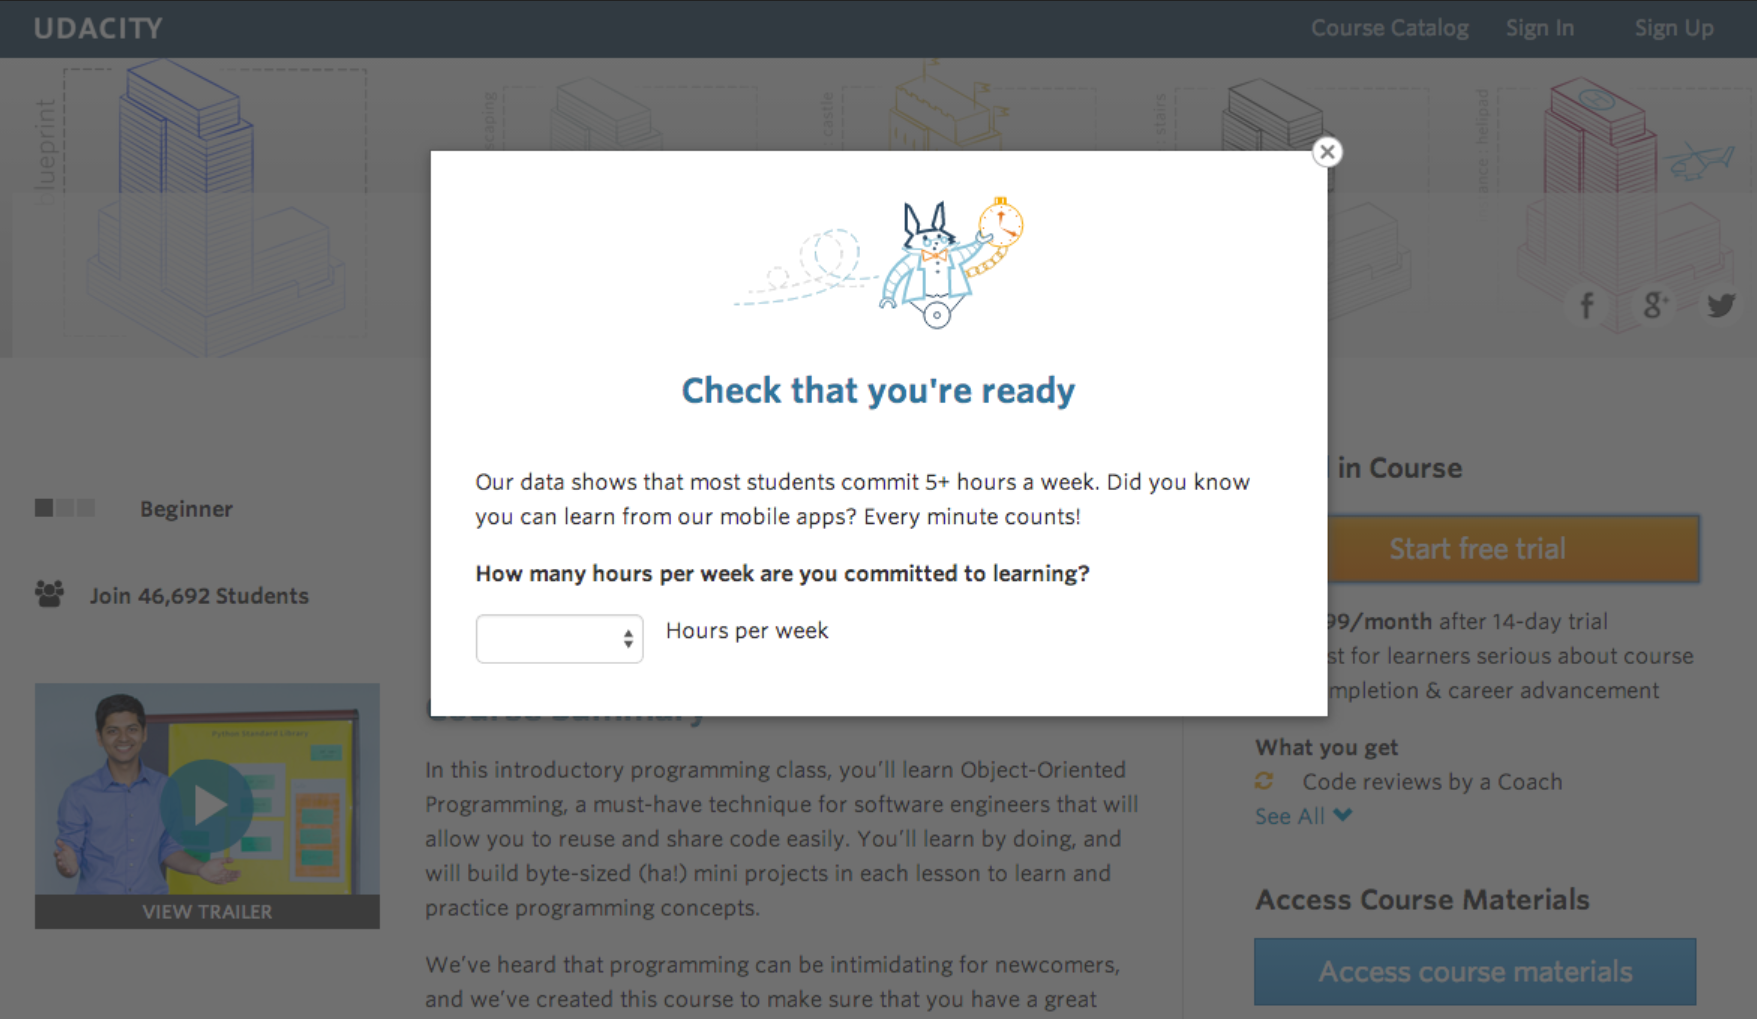

Udacity gives the following rough estimates for these metrics (presumably collected from aggregates on daily traffic)
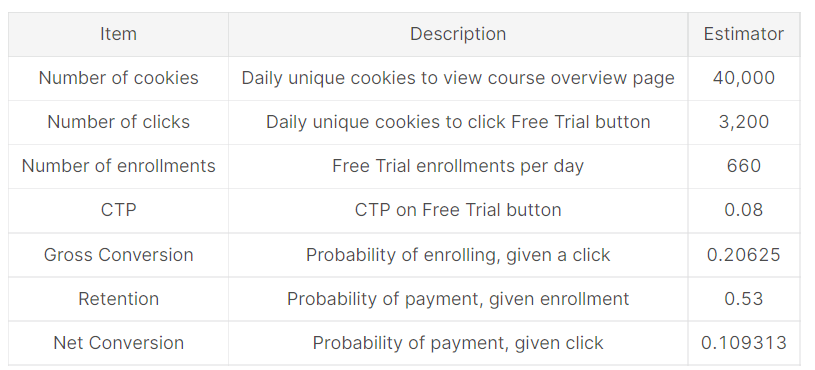

## Metric Choice 
We need two types of metrics for a successful experiment (or at least, a safe one); Invariate and evaluation metrics. Invariate metrics are used for "sanity checks", that is, to make sure our experiment (the way we presented a change to a part of the population, as well as the way we collected the data) is not inherently wrong. Basically, this means we pick metrics which we consider not to change (not to be affected) because of our experiment and later make sure these metrics don't change drastically between our control and experiment groups.
Evaluation metrics on the other hand, are the metrics in which we expect to see a change, and are relevant to the business goals we aim to achieve. For each metric we state a  Dmin  - which marks the minimum change which is practically significant to the business. For instance, stating that any increase in retention that is under 2%, even if statistically significant, is not practical to the business.

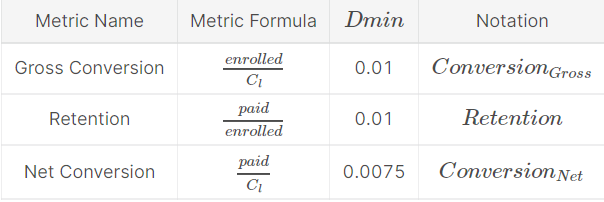

In [3]:
baseline = {"Cookies":40000,"Clicks":3200,"Enrollments":660,"CTP":0.08,"GConversion":0.20625,
           "Retention":0.53,"NConversion":0.109313}

## Estimating Standard Deviation 
Once we collected these estimates, we should estimate the standard deviation of a metric, this is computed for sample size calculations and confidence intervals for our results. The more variant a metric is, the harder it is to reach a significant result. Assuming a sample size of 5,000 cookies visiting the course overview page per day (as given in project's instructions) - we want to estimate a standard deviation, for the evaluation metrics only. The sample size we are considering should be smaller than the "population" we collected and small enough to have two groups with that size.

## Scaling Collected Data 
For all the calculations to follow we need to scale our collected counts estimates of metrics with the sample size we specified for variance estimation. In this case, from 40000 unique cookies to visit the course overview page per day, to 5000.

In [ ]:
#Scale The counts estimates
baseline["Cookies"] = 5000
baseline["Clicks"]=baseline["Clicks"]*(5000/40000)
baseline["Enrollments"]=baseline["Enrollments"]*(5000/40000)
baseline

In [5]:
#loading dataset
experiment=pd.read_csv(r'C:\\Users\\ll3371\\Desktop\\New folder\\experiment_data.csv')
control=pd.read_csv(r'C:\\Users\\ll3371\\Desktop\\New folder\\control_data.csv')
control.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0


## Sanity Checks
First thing we have to do before even beginning to analyze this experiment's results is sanity checks. These checks help verify that the experiment was conducted as expected and that other factors did not influence the data which we collected. This also makes sure that data collection was correct that the population in control and experiement groups are comparable

1. Check for Invariant metrics: any metrics that you don’t expect to see them change from your experiment, and remain the same for control and experimental group.

2. If we pick our unit of diversion as cookie, then we should check wether we get roughly the same number of cookies in both control and experiement group.

In [6]:
pageviews_cont=control['Pageviews'].sum()
pageviews_exp=experiment['Pageviews'].sum()
pageviews_total=pageviews_cont+pageviews_exp
print ("number of pageviews in control:", pageviews_cont)
print ("number of Pageviewsin experiment:" ,pageviews_exp)

number of pageviews in control: 345543
number of Pageviewsin experiment: 344660


In [7]:
clicks_cont=control['Clicks'].sum()
clicks_exp=experiment['Clicks'].sum()
clicks_total=clicks_cont+clicks_exp
print ("number of Clicks in control:", pageviews_cont)
print ("number of Clicks in experiment:" ,pageviews_exp)

number of Clicks in control: 345543
number of Clicks in experiment: 344660


It seems like we have more pageviews and clicks in control group. 



How would we figure out wether this diffrence is within expectations and difference in amounts is not significant and is random?

Given the design of the experiement: each cookie is randomly assigned to the control and experiment group with probability of 0.5. We can construct a binomial confidence interval if we consider being assigned to a group (control, for example) a success with probability 0.5 (random!), the number of samples which get assigned to the group is the value of our random binomial variable since we have very large N!

1. Compute standard deviation of binomial with probability 0.5 of success.

2. Multiply by the Z-score to get margin of error

3. Compute the confidence interval around 0.5

4. If our experiemnt set up properly, the fraction of successes (cookies) in the control group will fall within this confidence interval

In [9]:
# check for pageviews
p=0.5
alpha=0.05
p_hat=round(pageviews_cont/(pageviews_total),4)
sd=mt.sqrt(p*(1-p)/(pageviews_total)) #Compute standard deviation of binomial with probability 0.5 of success.
ME=round(norm.ppf(1-(alpha/2))*sd,4)  #Multiply by the Z-score to get margin of error
print ("The confidence interval is between",p-ME,"and",p+ME,"; Is",p_hat,"inside this range?")

The confidence interval is between 0.4988 and 0.5012 ; Is 0.5006 inside this range?


In [10]:
#check for clicks
p_hat=round(clicks_cont/clicks_total,4)
sd=mt.sqrt(p*(1-p)/clicks_total)
ME=round(norm.ppf(1-(alpha/2))*sd,4)
print ("The confidence interval is between",p-ME,"and",p+ME,"; Is",p_hat,"inside this range?")

The confidence interval is between 0.4959 and 0.5041 ; Is 0.5005 inside this range?


In [18]:
# Click-through-probability of the Free Trial Button In this case, we want to make sure the proportion of clicks given 
# a pageview (our observed CTP) is about the same in both groups (since this was not expected to change as its a action before
# the new change being shown). 

ctp_cont=clicks_cont/pageviews_cont
ctp_exp=clicks_exp/pageviews_exp
d_hat=round(ctp_exp-ctp_cont,4)
p_pooled=clicks_total/pageviews_total
sd_pooled=mt.sqrt(p_pooled*(1-p_pooled)*(1/pageviews_cont+1/pageviews_exp))
ME=round(norm.ppf(1-(alpha/2))*sd_pooled,4)
print ("The confidence interval is between",0-ME,"and",0+ME,"; Is",d_hat,"within this range?")

The confidence interval is between -0.0013 and 0.0013 ; Is 0.0 within this range?


- All 3 invariant metrics passed the check and the diffrence in  in amounts of control and experiment group is not significant - and is random!

- In other case if you cannot pass the sanity check (both or either one of your metrics fail):
1. talk to the engineer to see if the infrustruct of the experiment setup is wrong

2. conduct a retrospective analysis trying and recreating experiemnt diversion from the data capture, and understand that if there is something endemic to what you're trying to do that may be casusing the situation

3. we can rule out the cause of learning effect if we are seeing a big change right from the begining 

4. check the age of the cookies to see if there are more new users in one group

## What you can do if your results aren't significant, but you were expecting they would be. 

One tempting idea is to run the experiment for a few more days and see if the extra data helps get you a significant result. However, this can lead to a much higher false positive rate than you expecting! Instead of running for longer when you don't like the results, you should be sizing your experiment in advance (ex. break it down to diffrent platform or diffrent day of the week) to ensure that you will have enough power the first time you look at your results.

## Examining effect size 

The next step is looking at the changes between the control and experiment groups with regard to our evaluation metrics to make sure the difference is statistically significant and is practically siginificant. In other word, the diffrence is siginificant enough to implement the experimented change to all customers.

Rule of thumb is that: 
1. check for zero in the confidence interval ( if the confidence interval does not include 0, we can be confident there was a change)
2. see if the confidence interval incoude the practical siginificant (if so, we can't be 95% confident that the size of the effect is something we care about)

In [11]:
# Count the total clicks from complete records only
clicks_cont=control["Clicks"].loc[control["Enrollments"].notnull()].sum()
clicks_exp=experiment["Clicks"].loc[experiment["Enrollments"].notnull()].sum()

In [13]:
#Gross Conversion - number of enrollments divided by number of clicks
enrollments_cont=control["Enrollments"].sum()
enrollments_exp=experiment["Enrollments"].sum()

GC_cont=enrollments_cont/clicks_cont
GC_exp=enrollments_exp/clicks_exp

GC_cont=enrollments_cont/clicks_cont
GC_exp=enrollments_exp/clicks_exp

GC_pooled=(enrollments_cont+enrollments_exp)/(clicks_cont+clicks_exp)
GC_sd_pooled=mt.sqrt(GC_pooled*(1-GC_pooled)*(1/clicks_cont+1/clicks_exp))
GC_ME=round(norm.ppf(1-alpha/2)*GC_sd_pooled,4)
GC_diff=round(GC_exp-GC_cont,4)
print("The change due to the experiment is",GC_diff*100,"%")
print("Confidence Interval: [",GC_diff-GC_ME,",",GC_diff+GC_ME,"]")


The change due to the experiment is -2.06 %
Confidence Interval: [ -0.0292 , -0.012 ]


1. no zero include in the CI: there was a change due to the experiement
2. our practical siginificant is 1% and we have negative change pf 2.06%

According to the result, there are less people enrolled in the Free Trial due to the change we implemented in the experiement.

In [14]:
#Net Conversion - number of payments divided by number of clicks
payments_cont=control["Payments"].sum()
payments_exp=experiment["Payments"].sum()

NC_cont=payments_cont/clicks_cont
NC_exp=payments_exp/clicks_exp
NC_pooled=(payments_cont+payments_exp)/(clicks_cont+clicks_exp)
NC_sd_pooled=mt.sqrt(NC_pooled*(1-NC_pooled)*(1/clicks_cont+1/clicks_exp))
NC_ME=round(norm.ppf(1-alpha/2)*NC_sd_pooled,4)
NC_diff=round(NC_exp-NC_cont,4)
print("The change due to the experiment is",NC_diff*100,"%")
print("Confidence Interval: [",NC_diff-NC_ME,",",NC_diff+NC_ME,"]")

The change due to the experiment is -0.49 %
Confidence Interval: [ -0.0116 , 0.0018000000000000004 ]


There is zero include in the CI: the result is not statistically siginificant
## Conclusions & Recommendations
According to this result there was a change due to the experiment, that change was both statistically and practically significant. We have a negative change of 2.06%, when we were willing to accept any change greater than 1%. This means the Gross Conversion rate of the experiment group (the one exposed to the change, i.e. asked how many hours they can devote to studying) has decreased as expected by 2% and this change was significant. This means less people enrolled in the Free Trial after due to the pop-up.

We can only recommend to not continue with change. It may have caused a change in Gross conversion, but it didn't for net conversion.